# (Agglomerative) Hierarchical Clustering
Make every data point a cluster & combine closest clusters until all of them are merged  
Many different options to define "closest" clusters (closest points, farthest points, centroids, average distance)  
Model stores steps to achieve clusters in a dendrogram  
You can optimize the number of clusters by choosing the largest vertical movement without intersections in the dendrogram  

## Import Libraries

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [15]:
dataset = pd.read_csv("datasets/mall_customers.csv")
X = dataset.iloc[:, 2:].values

## Create Dendrogram

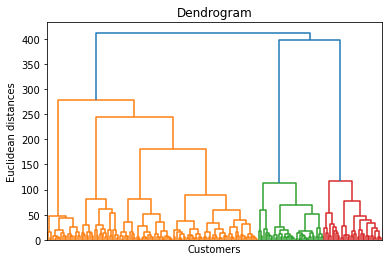

In [16]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))

plt.title("Dendrogram")
plt.xticks([])
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")

plt.show()

## Create Model

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
y_clusters = hc.fit_predict(X)


## Visualize Results

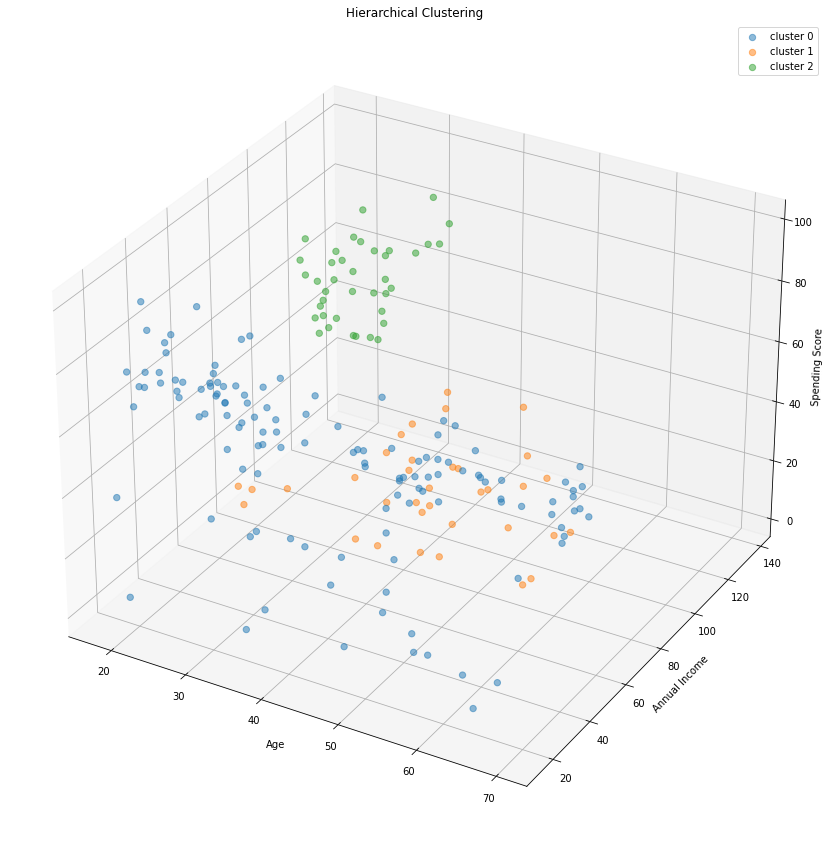

In [18]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection="3d")

scatters = []

for i in range(hc.n_clusters):
    scatters.append(ax.scatter(X[y_clusters == i, 0], X[y_clusters == i, 1], X[y_clusters == i, 2], s=40, alpha=0.5, label=f"cluster {i}"))

ax.set_title("Hierarchical Clustering")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

ax.legend()

plt.show()

## Create Video
<video src="hierarchical_clustering.mp4" style="max-width: 35rem" autoplay loop></video>

In [19]:
from matplotlib import animation

def init():
    ax.view_init(elev=10., azim=0)
    return scatters

def animate(i):
    ax.view_init(elev=10., azim=i)
    return scatters

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
anim.save("hierarchical_clustering.mp4", fps=30, extra_args=['-vcodec', 'libx264'])